# exploratory data analysis

In [2]:
import pandas as pd
#pd.__version__
#import statsmodels.api as sm
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt

In [3]:
file = "../nowdata/charters_full_2015_250_new.pkl"
rawdta = pd.read_pickle(file)

In [4]:
file2 = "../nowdata/ignore/charters_full_2015_15_250_counts.pkl"
rawdta2 = pd.read_pickle(file2)

In [5]:
right = rawdta2[['NCESSCH','ess_strength', 'prog_strength', 'PROG_COUNT', 'RIT_COUNT', 'ESS_COUNT', 'ESS_STR', 'PROG_STR', 'RIT_STR']]

In [6]:
merged = pd.merge(rawdta, right, on = ['NCESSCH'], how = "left")

In [ ]:
merged.to_pickle("../nowdata/charters_full_2015_250_new_counts.pkl")

In [4]:
def is_empty_list(series):
    """
    Args: Pandas Series of list
    Returns: a list contain Boolean value indicating whether the list is empty or not
    """
    lst = []
    for element in series:
        if len(element) == 0:
            lst.append(False)
        else:
            lst.append(True)
    return lst

In [5]:
#data cleaning
rawdta.dropna(axis = 0, how = 'any')
rawdta['constant'] = 1
rawdta = rawdta.loc[is_empty_list(rawdta['WEBTEXT']), :] #delete those with empty webtext

In [9]:
list(rawdta.columns)

['CMO_NAME',
 'CMO_MEMSUM',
 'SCH_NAME',
 'CMO_STATE',
 'CMO_SCHNUM',
 'CMO_URL',
 'CMO_NUMSTATES',
 'CMO_ALLSTATES',
 'CMO_SECTOR',
 'CMO_NUMSTUDENTS_CREDO17',
 'CMO_TYPE',
 'CMO_WEBTEXT',
 'SURVYEAR',
 'FIPST',
 'STABR',
 'SEANAME',
 'LEAID',
 'ST_LEAID',
 'SCHID',
 'ST_SCHID',
 'NCESSCH',
 'MSTREET1',
 'MSTREET2',
 'MSTREET3',
 'MCITY',
 'MSTATE',
 'MZIP',
 'MZIP4',
 'PHONE',
 'LSTREET1',
 'LSTREET2',
 'LSTREET3',
 'LCITY',
 'LSTATE',
 'LZIP',
 'LZIP4',
 'UNION',
 'OUT_OF_STATE_FLAG',
 'SCH_TYPE_TEXT',
 'SCH_TYPE',
 'RECON_STATUS',
 'GSLO',
 'GSHI',
 'LEVEL',
 'VIRTUAL',
 'BIES',
 'SY_STATUS_TEXT',
 'SY_STATUS',
 'UPDATED_STATUS_TEXT',
 'UPDATED_STATUS',
 'EFFECTIVE_DATE',
 'CHARTER_TEXT',
 'G13OFFERED',
 'AEOFFERED',
 'UGOFFERED',
 'NOGRADES',
 'CHARTAUTH1',
 'CHARTAUTHN1',
 'CHARTAUTH2',
 'CHARTAUTHN2',
 'IGOFFERED',
 'WEBSITE',
 'FRELCH',
 'REDLCH',
 'AE',
 'TOTAL',
 'AM',
 'AMALM',
 'AMALF',
 'AS',
 'ASALM',
 'ASALF',
 'HI',
 'HIALM',
 'HIALF',
 'BL',
 'BLALM',
 'BLALF',
 'WH',


In [6]:
len(rawdta['ESS_STR'])

KeyError: 'ESS_STR'

# Regress on ESS_STR

In [19]:
# Regress '% Total Population: White Alone'
#         "% Population 25 Years and Over: Bachelor's Degree",
#         '% Civilian Population in Labor Force 16 Years and Over: Unemployed'
#         '% Families: Income in Below Poverty Level'
#         '% Total Population: Foreign Born'
#         'Population Density (Per Sq. Mile)'
#         'constant'
# On      'ESS_STR'  measurement of the magnitude of traditionism
OLS1_dta = rawdta[['ESS_STR','% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
OLS1_dta = OLS1_dta.dropna(how = "any")
Y = OLS1_dta['ESS_STR']
X = OLS1_dta[['% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ESS_STR   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     27.11
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           2.41e-31
Time:                        18:51:16   Log-Likelihood:                -3849.1
No. Observations:                2235   AIC:                             7712.
Df Residuals:                    2228   BIC:                             7752.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0009      0.002     -0.396      0.692      -0.005       0.003
% Population 25 Years and Over: Bachelor's Degree                      0.0063      0.007      0.966      0.334      -0.007       0.019
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0204      0.014      1.454      0.146      -0.007       0.048
% Families: Income in Below Poverty Level                             -0.0018      0.008     -0.233      0.816      -0.017       0.013
% Total Population: Foreign Born                                      -0.0264      0.002    -11.189      0.000      -0.031      -0.022
Population Density (Per Sq. Mile)                                   8.972e-05   1.26e-05      7.135      0.000    6.51e-05       0.000
constant                                                              -3.5342      0.315    -11.235      0.000      -4.151      -2.917
==============================================================================
Omnibus:                      279.408   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.020
Skew:                          -0.881   Prob(JB):                     5.32e-70
Kurtosis:                       2.433   Cond. No.                     4.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

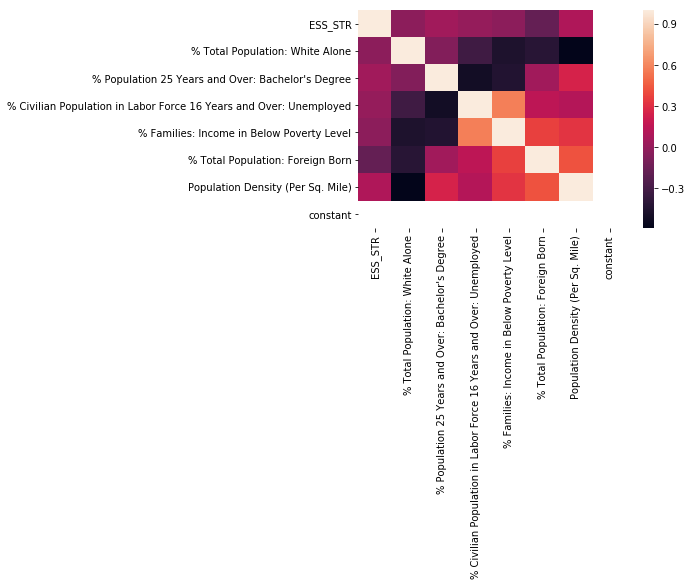

In [17]:
#check for multi-colinearity
corr = OLS1_dta.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

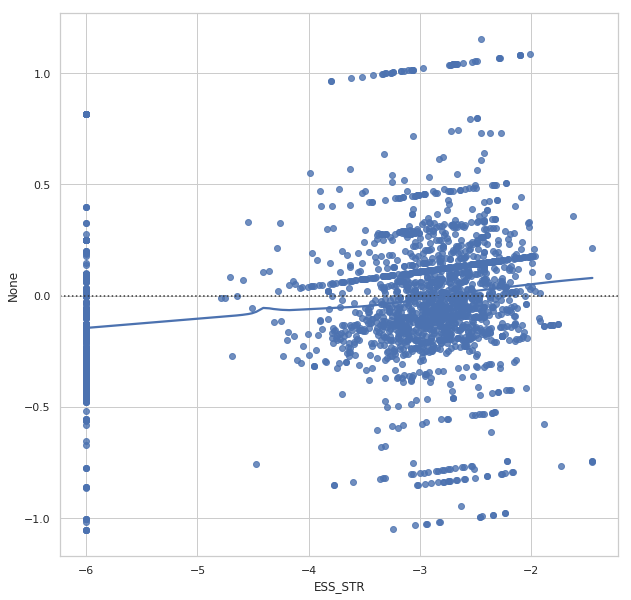

In [30]:
#check for heteroskedasticity
sns.set(style="whitegrid")
plt.figure(figsize = (10,10))
sns.residplot(Y, results.resid, lowess=True, color="b")

# Regress on PROG_STR

In [32]:
OLS2_dta = rawdta[['PROG_STR','% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
OLS2_dta = OLS2_dta.dropna(how = "any")
Y2 = OLS2_dta['PROG_STR']
X2 = OLS2_dta[['% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
results2 = sm.OLS(Y2, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PROG_STR   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     37.11
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           4.32e-43
Time:                        19:06:15   Log-Likelihood:                -3814.4
No. Observations:                2235   AIC:                             7643.
Df Residuals:                    2228   BIC:                             7683.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0019      0.002     -0.900      0.368      -0.006       0.002
% Population 25 Years and Over: Bachelor's Degree                      0.0038      0.006      0.591      0.554      -0.009       0.017
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0043      0.014      0.312      0.755      -0.023       0.031
% Families: Income in Below Poverty Level                             -0.0117      0.008     -1.534      0.125      -0.027       0.003
% Total Population: Foreign Born                                      -0.0312      0.002    -13.417      0.000      -0.036      -0.027
Population Density (Per Sq. Mile)                                   8.199e-05   1.24e-05      6.622      0.000    5.77e-05       0.000
constant                                                              -2.9235      0.310     -9.439      0.000      -3.531      -2.316
==============================================================================
Omnibus:                      276.035   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.023
Skew:                          -1.011   Prob(JB):                     2.47e-84
Kurtosis:                       2.792   Cond. No.                     4.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

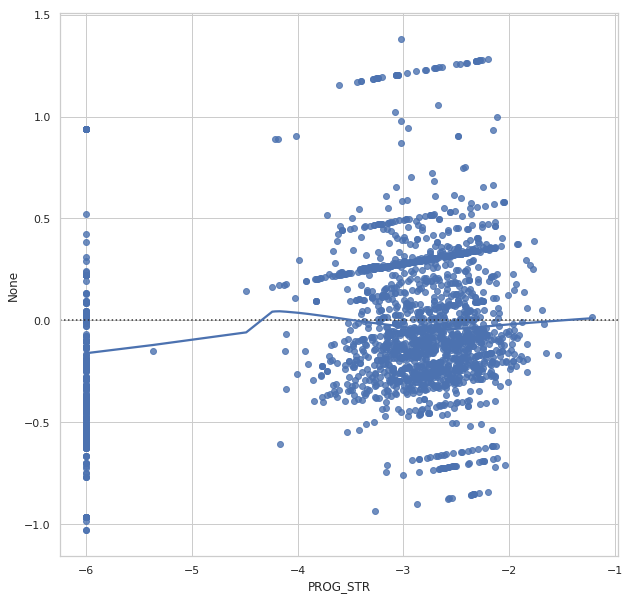

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize = (10,10))
sns.residplot(Y2, results2.resid, lowess=True, color="b")

# More Variables

In [49]:
OLS3_dta = rawdta[['PROG_STR','% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
OLS3_dta = OLS3_dta.dropna(how = "any")
Y3 = OLS3_dta['PROG_STR']
X3 = OLS3_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
results3 = sm.OLS(Y3.astype(float), X3.astype(float)).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PROG_STR   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     18.03
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           6.95e-43
Time:                        19:34:14   Log-Likelihood:                -3434.8
No. Observations:                2028   AIC:                             6900.
Df Residuals:                    2013   BIC:                             6984.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0039      0.003     -1.490      0.136      -0.009       0.001
% Population 25 Years and Over: Bachelor's Degree                     -0.0034      0.007     -0.462      0.644      -0.018       0.011
% Civilian Population in Labor Force 16 Years and Over: Unemployed    -0.0006      0.015     -0.042      0.966      -0.030       0.029
% Families: Income in Below Poverty Level                              0.0092      0.010      0.890      0.373      -0.011       0.029
% Total Population: Foreign Born                                      -0.0267      0.003     -9.172      0.000      -0.032      -0.021
Population Density (Per Sq. Mile)                                   8.639e-05   1.41e-05      6.118      0.000    5.87e-05       0.000
STR                                                                    0.0002      0.000      1.060      0.289      -0.000       0.001
PCTETH                                                                -0.6291      0.161     -3.902      0.000      -0.945      -0.313
PCTFRL                                                                -0.1515      0.108     -1.398      0.162      -0.364       0.061
MEMBER                                                              8.323e-05   6.27e-05      1.328      0.184   -3.97e-05       0.000
AGE                                                                   -0.0011      0.006     -0.186      0.852      -0.012       0.010
SD_lv_PVI_2017                                                        -0.0005      0.004     -0.149      0.882      -0.007       0.006
close_rate16                                                           0.7905      1.138      0.695      0.487      -1.441       3.022
Median Household Income (In 2016 Inflation Adjusted Dollars)        7.418e-06   3.44e-06      2.155      0.031    6.68e-07    1.42e-05
constant                                                              -2.9506      0.421     -7.001      0.000      -3.777      -2.124
==============================================================================
Omnibus:                      242.517   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              336.456
Skew:                          -0.995   Prob(JB):                     8.70e-74
Kurtosis:                       2.845   Cond. No.                     2.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+06. This might indicate that there 

In [50]:
OLS4_dta = rawdta[['ESS_STR','% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
OLS4_dta = OLS4_dta.dropna(how = "any")
Y4 = OLS4_dta['ESS_STR']
X4 = OLS4_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
results4 = sm.OLS(Y4.astype(float), X4.astype(float)).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ESS_STR   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     12.73
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           3.77e-29
Time:                        19:35:19   Log-Likelihood:                -3469.3
No. Observations:                2028   AIC:                             6969.
Df Residuals:                    2013   BIC:                             7053.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0005      0.003     -0.191      0.848      -0.006       0.005
% Population 25 Years and Over: Bachelor's Degree                     -0.0052      0.007     -0.699      0.485      -0.020       0.009
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0117      0.015      0.775      0.439      -0.018       0.041
% Families: Income in Below Poverty Level                              0.0112      0.010      1.071      0.284      -0.009       0.032
% Total Population: Foreign Born                                      -0.0256      0.003     -8.643      0.000      -0.031      -0.020
Population Density (Per Sq. Mile)                                   8.648e-05   1.44e-05      6.021      0.000    5.83e-05       0.000
STR                                                                    0.0003      0.000      1.441      0.150      -0.000       0.001
PCTETH                                                                -0.3119      0.164     -1.902      0.057      -0.634       0.010
PCTFRL                                                                -0.0617      0.110     -0.560      0.576      -0.278       0.154
MEMBER                                                                 0.0002   6.38e-05      2.732      0.006    4.91e-05       0.000
AGE                                                                    0.0023      0.006      0.397      0.691      -0.009       0.014
SD_lv_PVI_2017                                                        -0.0034      0.004     -0.933      0.351      -0.010       0.004
close_rate16                                                           0.8331      1.157      0.720      0.472      -1.436       3.103
Median Household Income (In 2016 Inflation Adjusted Dollars)        7.377e-06    3.5e-06      2.107      0.035    5.11e-07    1.42e-05
constant                                                              -3.7471      0.429     -8.741      0.000      -4.588      -2.906
==============================================================================
Omnibus:                      235.933   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.958
Skew:                          -0.879   Prob(JB):                     5.94e-62
Kurtosis:                       2.503   Cond. No.                     2.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+06. This might indicate that there 

In [60]:
groups = OLS3_dta[['SD_lv_PVI_2017', 'close_rate16', '% Total Population: White Alone', "% Population 25 Years and Over: Bachelor's Degree", '% Civilian Population in Labor Force 16 Years and Over: Unemployed', '% Families: Income in Below Poverty Level', '% Total Population: Foreign Born', 'Population Density (Per Sq. Mile)', 'Median Household Income (In 2016 Inflation Adjusted Dollars)']]
X5 = OLS3_dta[['STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE']]
import statsmodels.formula.api as smf

md = smf.mixedlm( "PROG_STR ~ STR+ PCTETH+ PCTFRL+ MEMBER+ AGE", OLS3_dta,  groups=OLS3_dta['SD_lv_PVI_2017'])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: PROG_STR  
No. Observations: 2028    Method:             REML      
No. Groups:       273     Scale:              1.5910    
Min. group size:  1       Likelihood:         -3440.0414
Max. group size:  190     Converged:          Yes       
Mean group size:  7.4                                   
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -3.027    0.105 -28.758 0.000 -3.234 -2.821
STR          -0.000    0.000  -0.257 0.797 -0.000  0.000
PCTETH       -0.465    0.140  -3.328 0.001 -0.739 -0.191
PCTFRL       -0.196    0.108  -1.811 0.070 -0.408  0.016
MEMBER        0.000    0.000   1.746 0.081 -0.000  0.000
AGE          -0.003    0.006  -0.465 0.642 -0.014  0.009
Group Var     0.235    0.041                            
========================================================

"""